In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
# Load the dataset
data = pd.read_csv('fake_data.csv')

<font size="6">Data Preprocessing</font>

In [3]:
print("Size of the dataset:", data.size)
print("Shape of the dataset:", data.shape)
print("Description of the dataset:\n", data.describe())

Size of the dataset: 700000
Shape of the dataset: (100000, 7)
Description of the dataset:
             Duration
count  100000.000000
mean      718.118010
std       416.077577
min         0.000000
25%       358.000000
50%       716.000000
75%      1078.000000
max      1439.000000


In [4]:
# Display the first few rows of the dataset to understand its structure
data.head()

,ID,Trainer Name,Session Name,Start Time,End Time,Duration,Status
0,23519107-060a-4920-9a68-ad1128b49217,Alexis Smith,Java,2024-03-26 03:41:01,2024-03-28 17:58:01,857,Not Completed
1,12502fff-32a8-41af-9981-f2a0ed094b37,Margaret May,PHP,2024-01-17 16:49:27,2024-01-20 16:01:27,1392,Not Completed
2,8be991ad-5eac-40d8-8313-0d827c0e524b,Scott Griffin,Data Science,2024-01-03 21:34:57,2024-01-05 18:40:57,1266,Not Completed
3,1baeca94-a6e0-43de-8c8e-6e419567ee3a,Anthony Waller,PHP,2024-03-11 13:44:43,2024-03-14 20:03:43,379,Not Completed
4,b26b36b8-c7f7-43da-b823-a9a22ad43731,Anthony White,Data Science,2024-01-03 01:25:38,2024-01-04 14:18:38,773,Completed


In [5]:
# Remove unwanted columns
data.drop(columns=['ID'], inplace=True)
# Convert date and time columns to datetime objects
data['Start Time'] = pd.to_datetime(data['Start Time'])
data['End Time'] = pd.to_datetime(data['End Time'])
data['Duration'] = (data['End Time'] - data['Start Time']).dt.total_seconds() / 60  # Convert duration to minutes

<font size="6">Feature Engineering</font>

C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


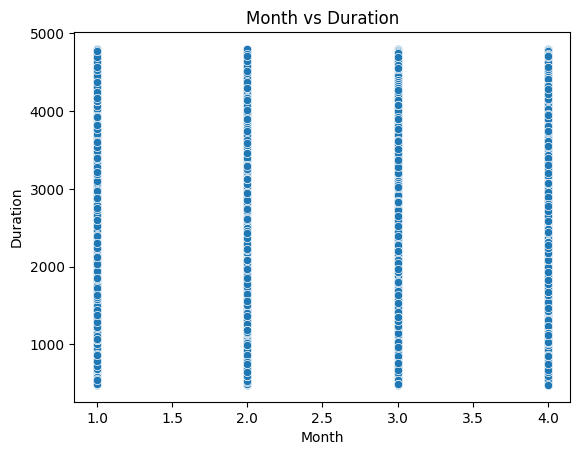

C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


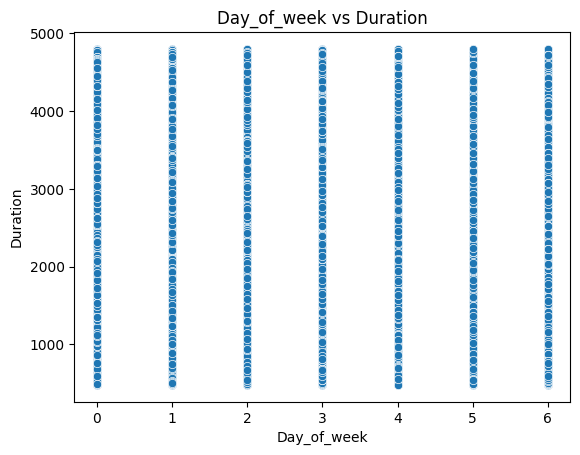

C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


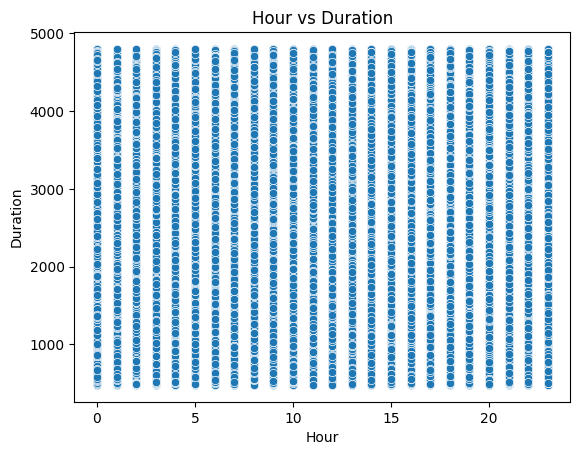

In [6]:
# Feature engineering
data['Month'] = data['Start Time'].dt.month
data['Day_of_week'] = data['Start Time'].dt.dayofweek
data['Hour'] = data['Start Time'].dt.hour
data['Session_Duration'] = data['Duration']

# Convert 'Status' column to binary (1 for completed, 0 for not completed)
data['Status'] = data['Status'].apply(lambda x: 1 if x == 'Completed' else 0)

# Bivariate Analysis
# Plot relationship between numerical features and target variable 'Duration'
num_features = ['Month', 'Day_of_week', 'Hour']
for feature in num_features:
    sns.scatterplot(x=feature, y='Duration', data=data)
    plt.title(f'{feature} vs Duration')
    plt.show()

C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


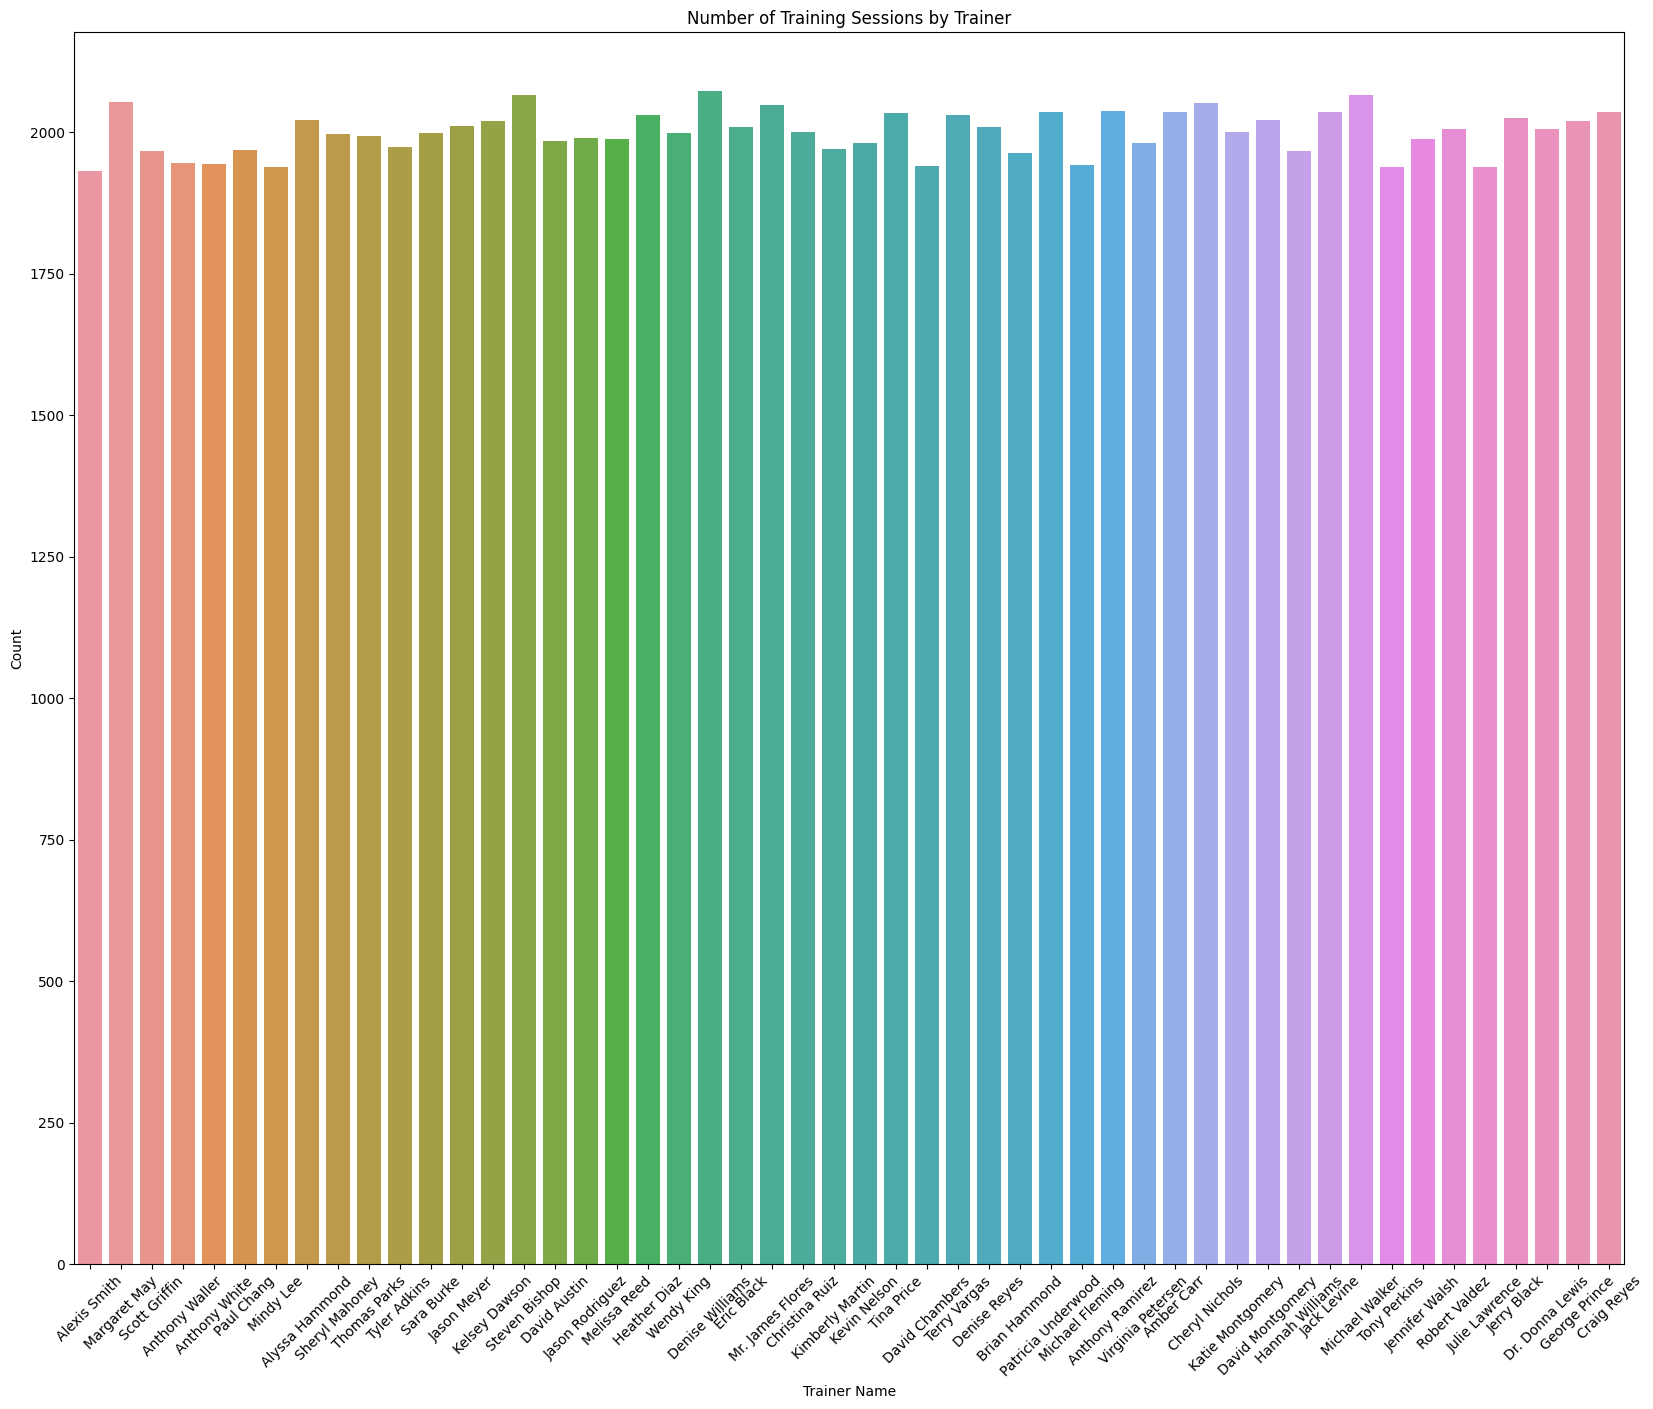

In [7]:
# Univariate Analysis for Trainer Name
plt.figure(figsize=(20, 16))
sns.countplot(x='Trainer Name', data=data)
plt.title('Number of Training Sessions by Trainer')
plt.xlabel('Trainer Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


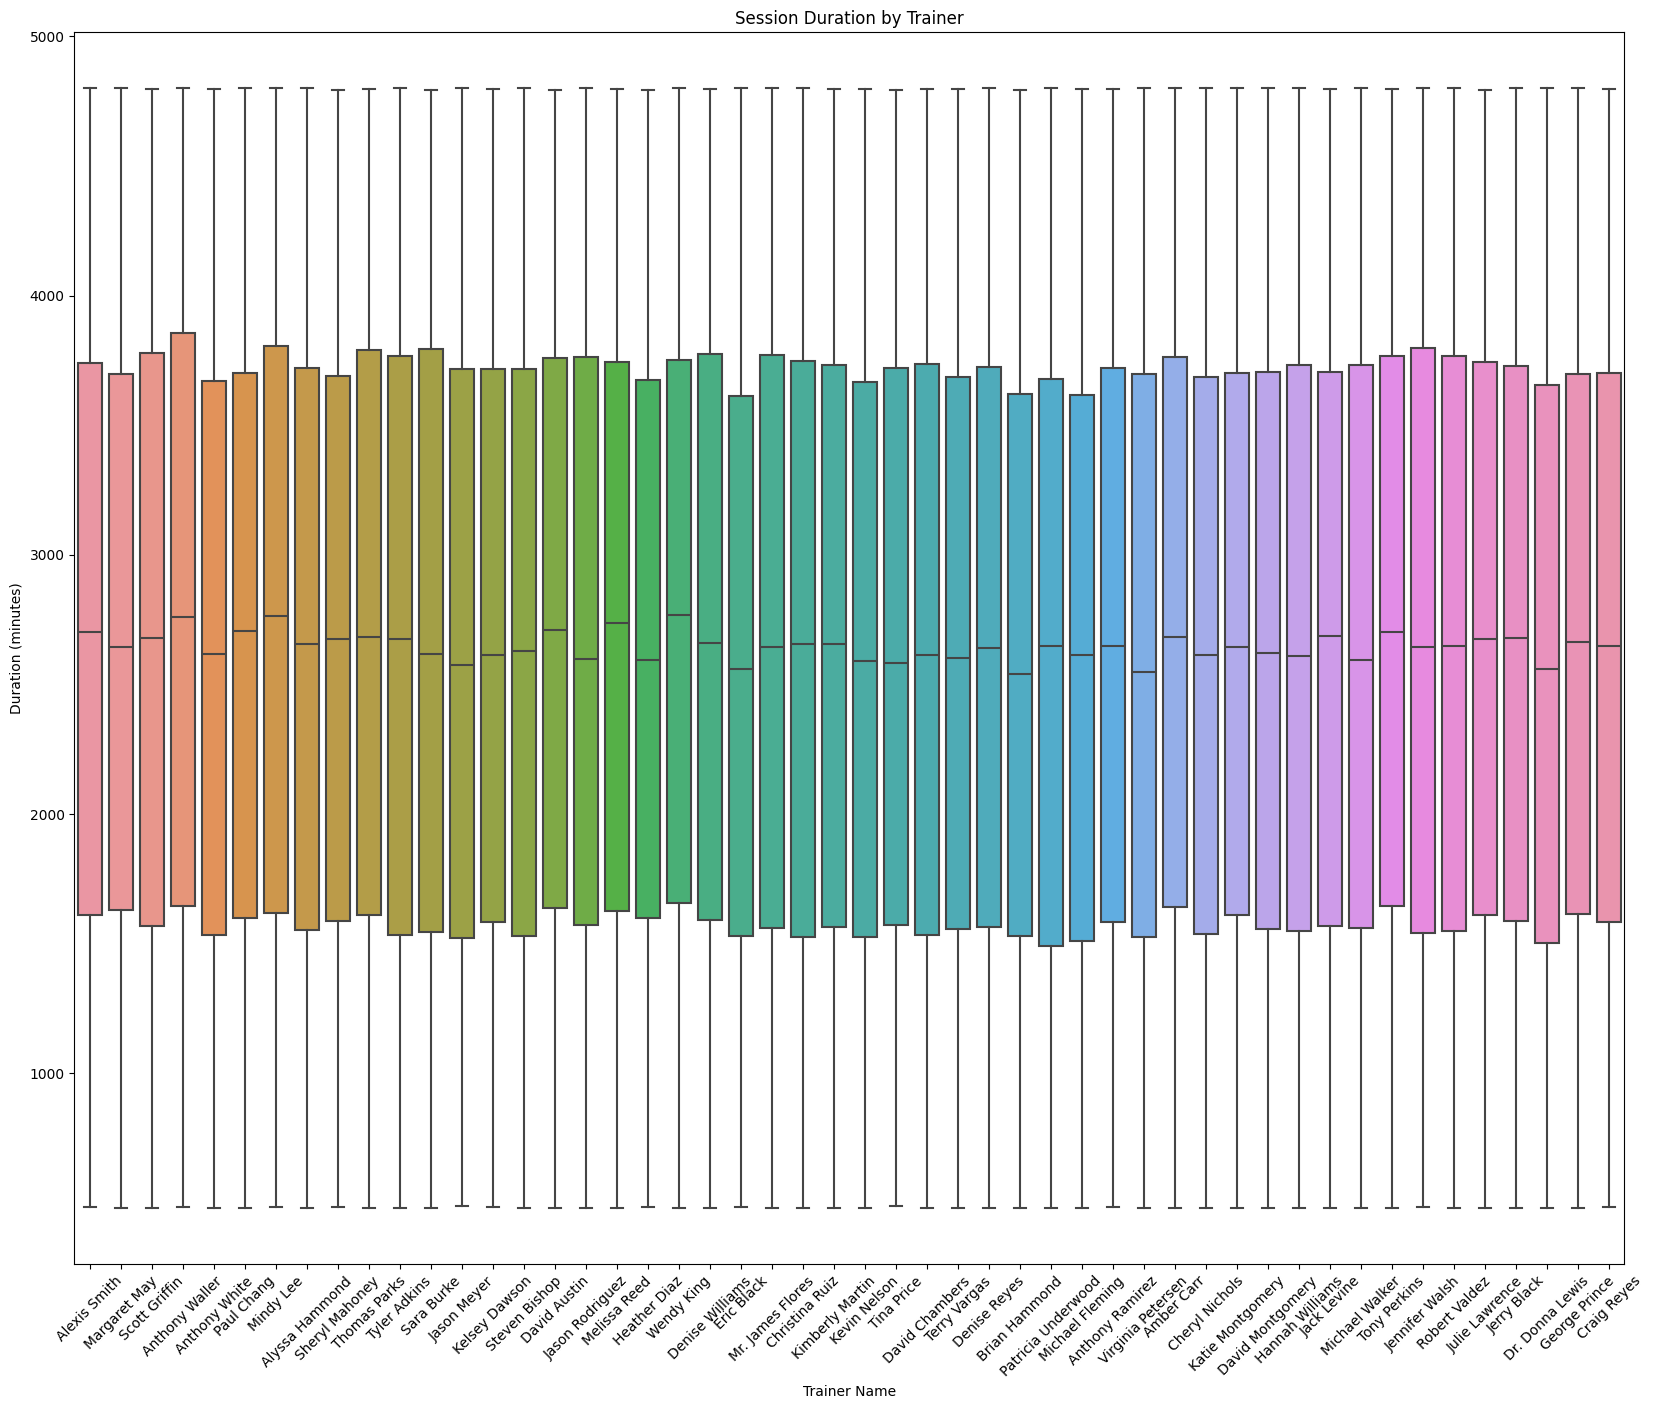

In [8]:
# bivariate Analysis for Trainer Name
plt.figure(figsize=(20, 16))
sns.boxplot(x='Trainer Name', y='Duration', data=data)
plt.title('Session Duration by Trainer')
plt.xlabel('Trainer Name')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


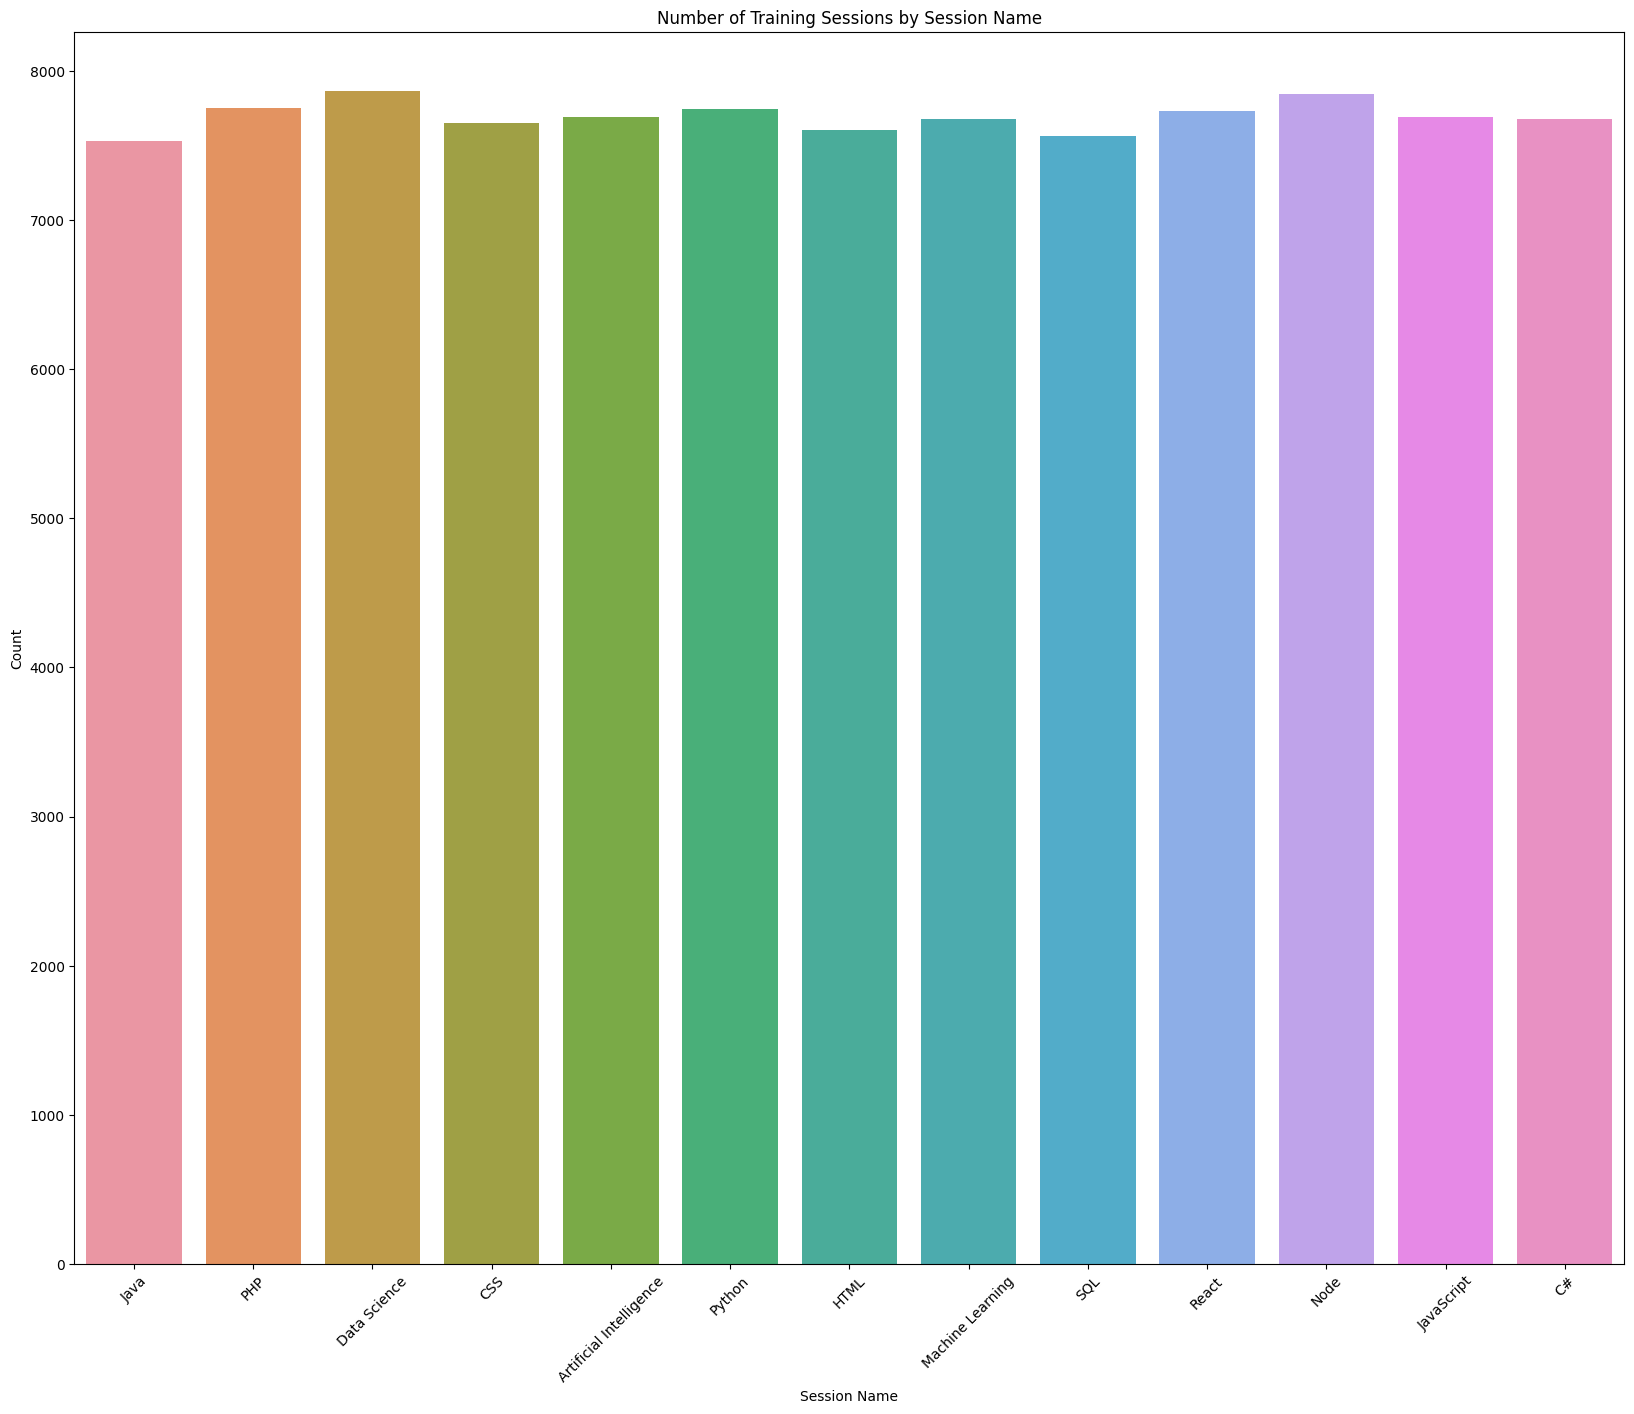

In [9]:
# Univariate Analysis for Session Name
plt.figure(figsize=(20, 16))
sns.countplot(x='Session Name', data=data)
plt.title('Number of Training Sessions by Session Name')
plt.xlabel('Session Name')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\super\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


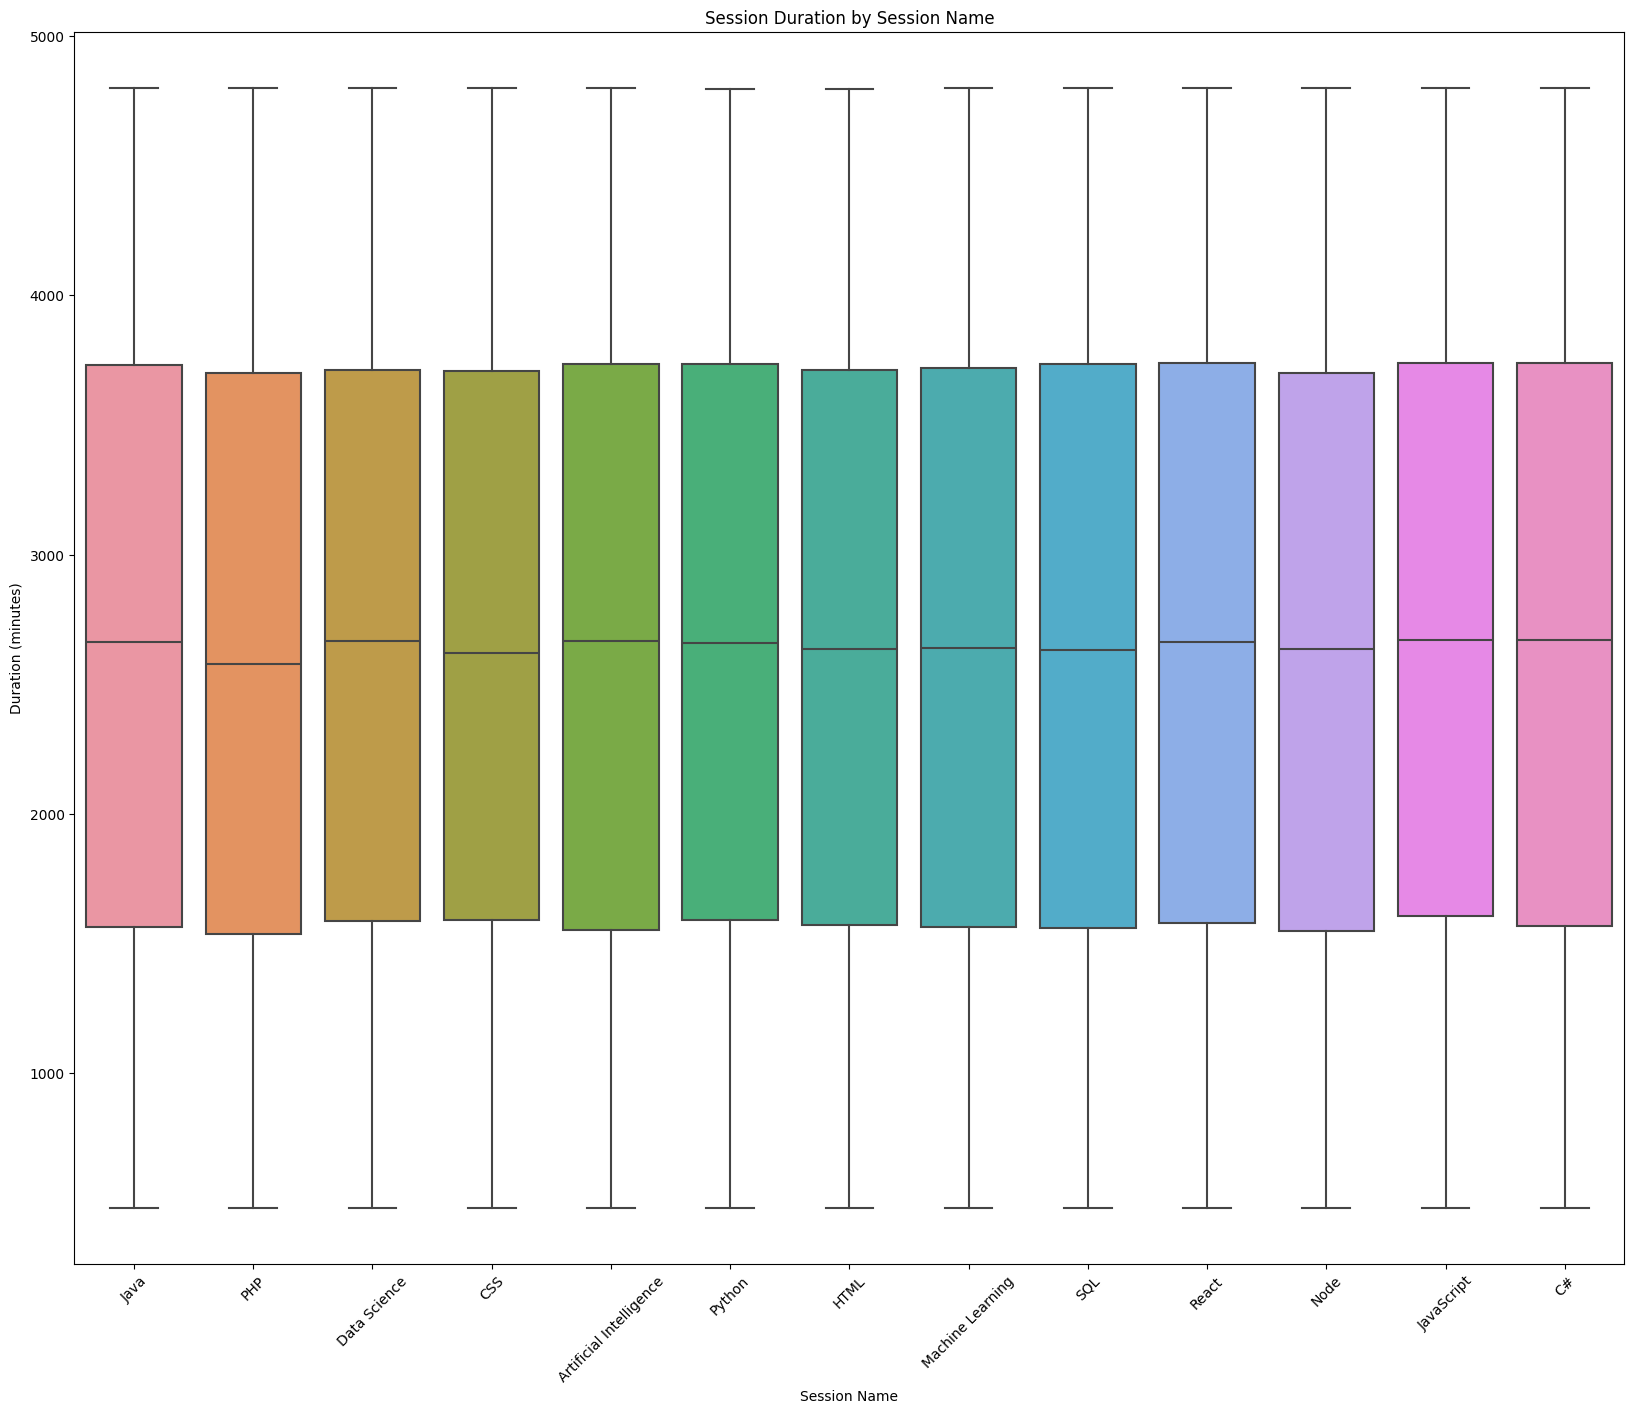

In [10]:
# bivariate Analysis for Session Name
plt.figure(figsize=(20, 16))
sns.boxplot(x='Session Name', y='Duration', data=data)
plt.title('Session Duration by Session Name')
plt.xlabel('Session Name')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

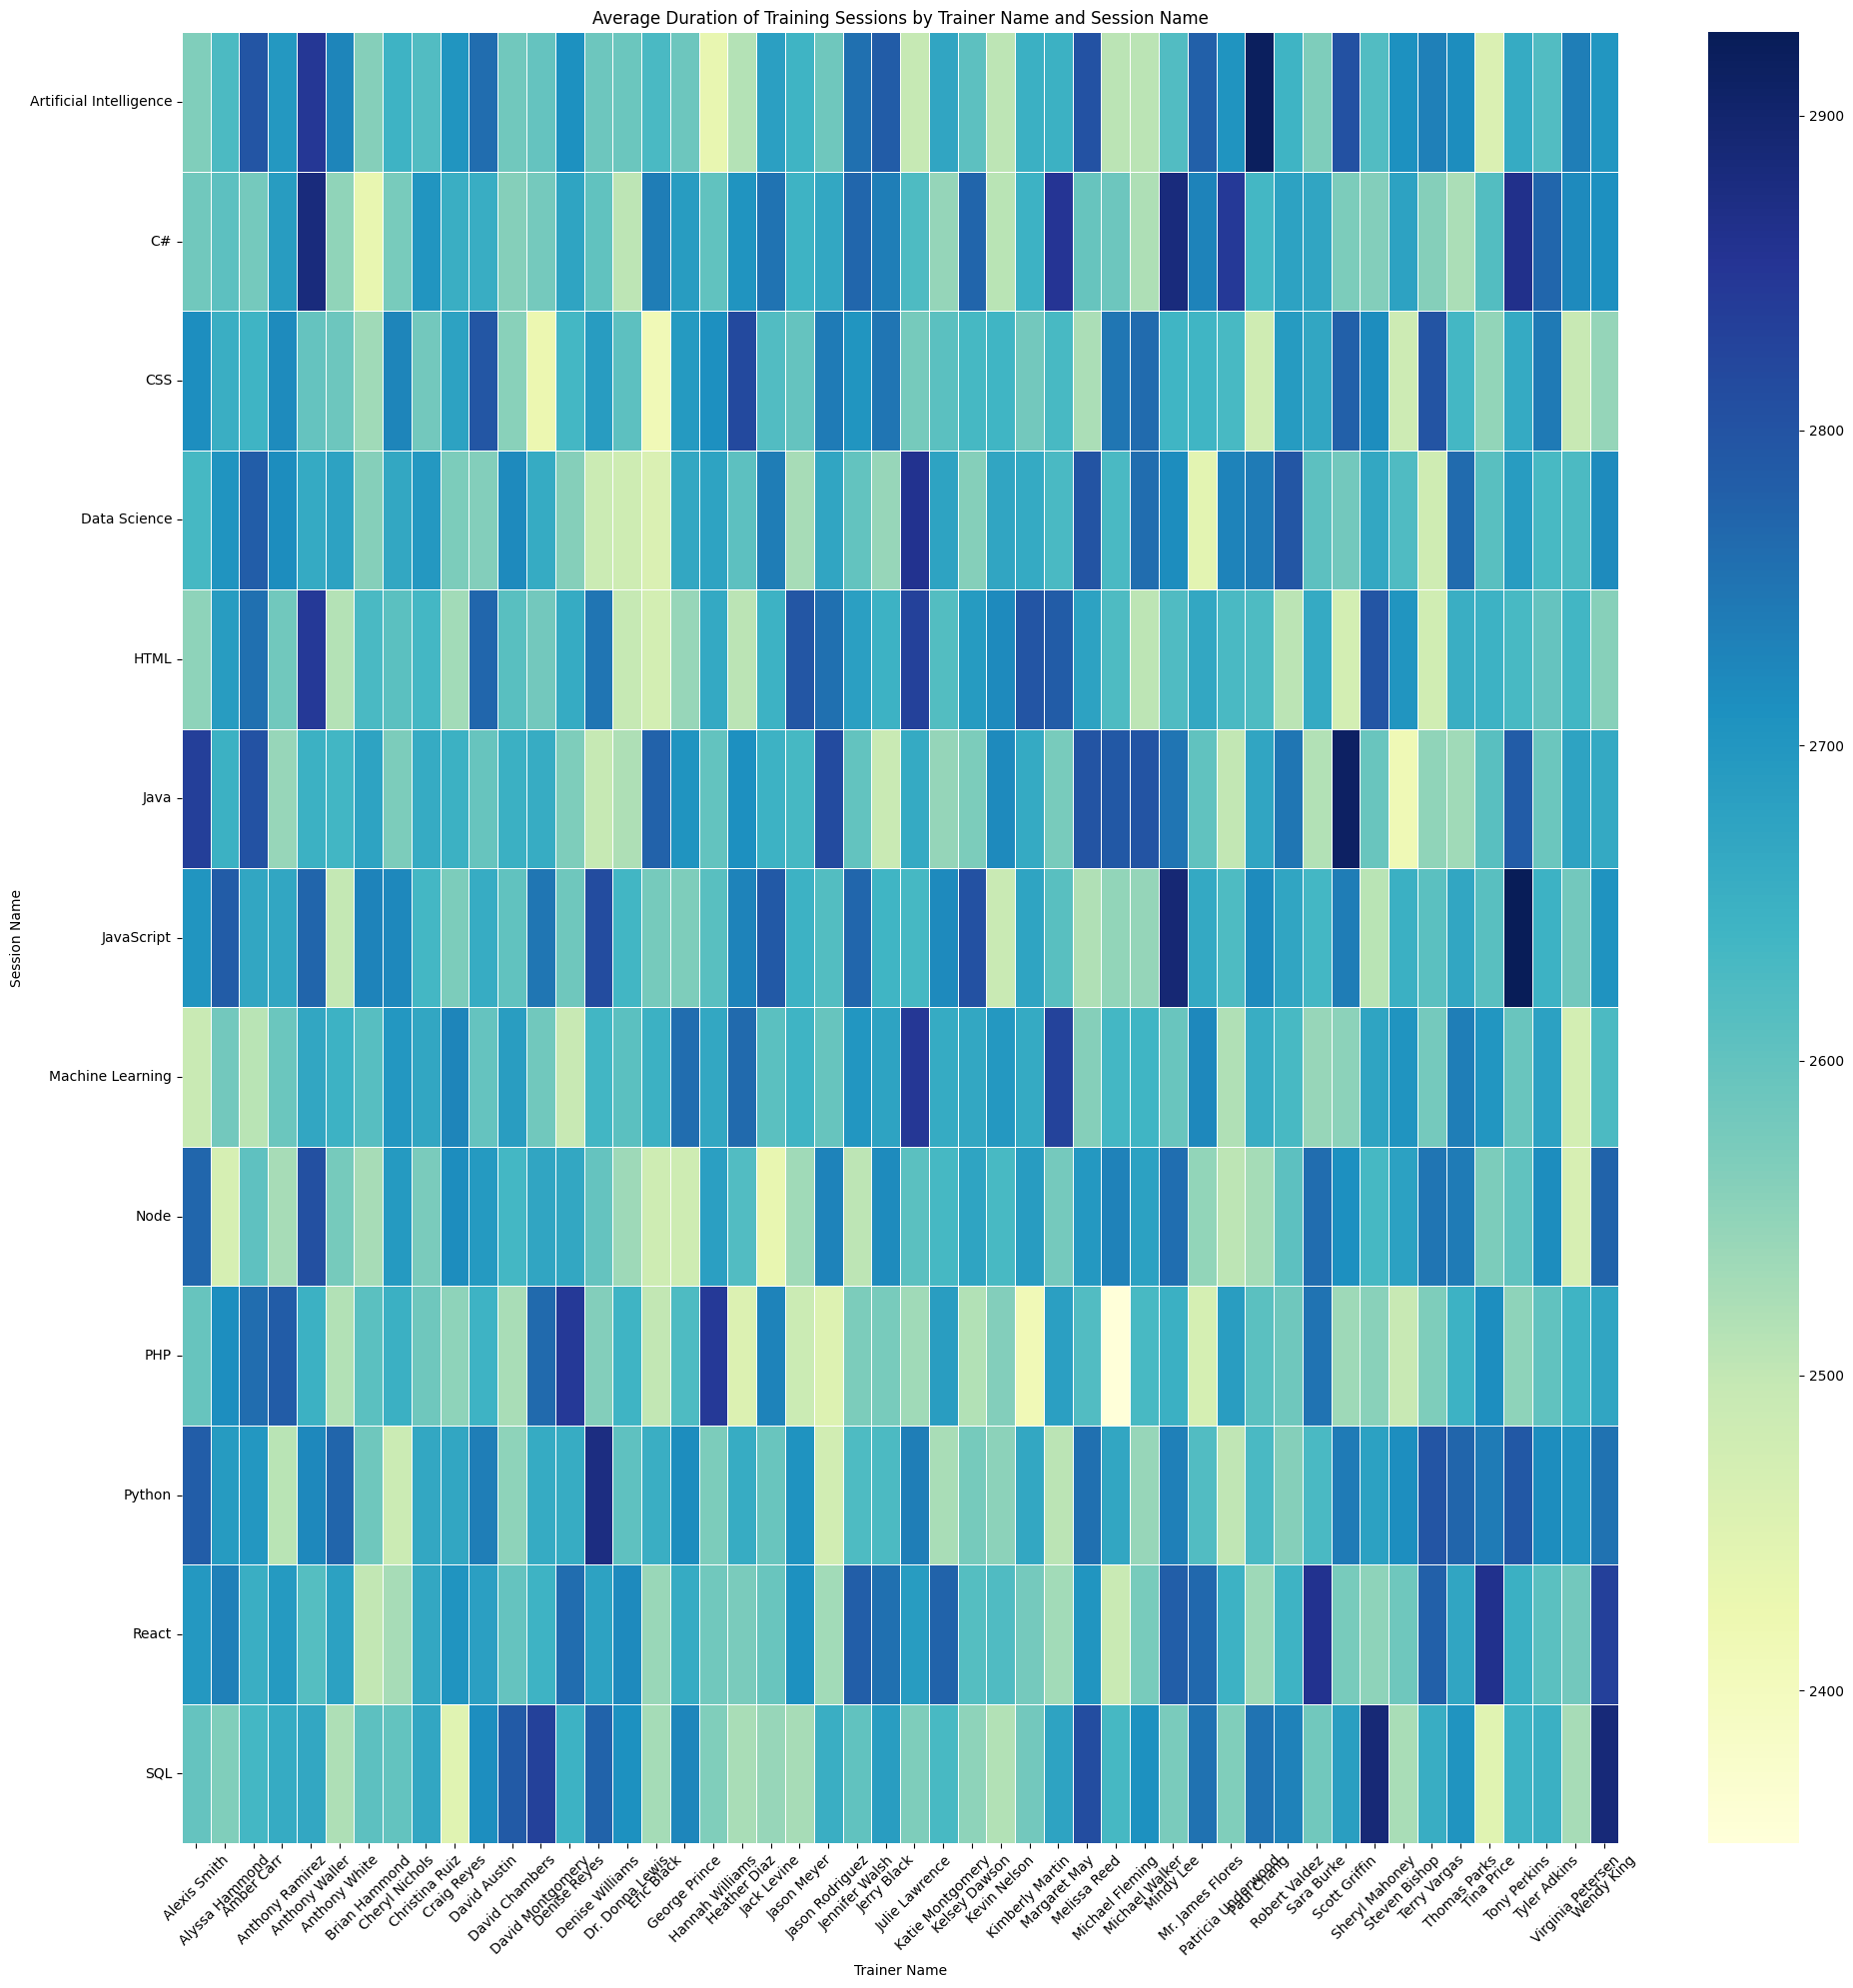

In [11]:
# Multivariate Analysis for Trainer Name, Session Name, and Duration
# Group data by Trainer Name and Session Name, calculate the average duration
grouped_data = data.groupby(['Trainer Name', 'Session Name'])['Duration'].mean().reset_index()

# Pivot the data to prepare for heatmap visualization
pivot_data = grouped_data.pivot(index='Session Name', columns='Trainer Name', values='Duration')

# Plot heatmap without annotations
plt.figure(figsize=(20, 20))
sns.heatmap(pivot_data, cmap='YlGnBu', linewidths=0.5)
plt.title('Average Duration of Training Sessions by Trainer Name and Session Name')
plt.xlabel('Trainer Name')
plt.ylabel('Session Name')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tick_params(axis='both', which='major', labelsize=10)  # Adjust tick label font size
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<font size="6">Data Transformation</font>

In [12]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['Trainer Name', 'Session Name'])


In [13]:
# Display the preprocessed data
print("\nPreprocessed data:\n", data.head())


Preprocessed data:
            Start Time            End Time  Duration  Status  Month  \
0 2024-03-26 03:41:01 2024-03-28 17:58:01    3737.0       0      3   
1 2024-01-17 16:49:27 2024-01-20 16:01:27    4272.0       0      1   
2 2024-01-03 21:34:57 2024-01-05 18:40:57    2706.0       0      1   
3 2024-03-11 13:44:43 2024-03-14 20:03:43    4699.0       0      3   
4 2024-01-03 01:25:38 2024-01-04 14:18:38    2213.0       1      1   

   Day_of_week  Hour  Session_Duration  Trainer Name_Alexis Smith  \
0            1     3            3737.0                       True   
1            2    16            4272.0                      False   
2            2    21            2706.0                      False   
3            0    13            4699.0                      False   
4            2     1            2213.0                      False   

   Trainer Name_Alyssa Hammond  ...  Session Name_Data Science  \
0                        False  ...                      False   
1          

<font size="6">Selecting Features</font>

In [14]:
# Selecting Features
X = data.drop(['Start Time', 'End Time', 'Duration', 'Status','Month','Day_of_week','Hour'], axis=1)  # Drop unnecessary columns
y = data['Duration']

In [15]:
X.head()

,Session_Duration,Trainer Name_Alexis Smith,Trainer Name_Alyssa Hammond,Trainer Name_Amber Carr,Trainer Name_Anthony Ramirez,Trainer Name_Anthony Waller,Trainer Name_Anthony White,Trainer Name_Brian Hammond,Trainer Name_Cheryl Nichols,Trainer Name_Christina Ruiz,...,Session Name_Data Science,Session Name_HTML,Session Name_Java,Session Name_JavaScript,Session Name_Machine Learning,Session Name_Node,Session Name_PHP,Session Name_Python,Session Name_React,Session Name_SQL
0,3737.0,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,4272.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2706.0,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,4699.0,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2213.0,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False


<font size="6">Model Training</font>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<font size="6">Model Evaluation</font>

In [17]:
# Model Evaluation
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)
r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)

Mean Absolute Error: 1.1271102569783882e-12
R2 Score: 1.0


High R2 score meaning the model is overfitting ... this can be changed by using Ridge Regression is a linear regression model that includes L2 regularization and choosing the optimal hyperparameter

In [20]:
param_grid = {'alpha': [100000000000.0,1000000000000.0,10000000000000.0]}  

# Initialize Ridge Regression model
ridge_model = Ridge()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Model Evaluation
predictions = best_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Optimal Hyperparameters:", best_params)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Optimal Hyperparameters: {'alpha': 100000000000.0}
Mean Absolute Error: 515.3639509922582
R2 Score: 0.7705829058839377


<font size="6">Best Model with Optimal Parameters</font>

In [31]:
param_grid = {
    'n_estimators': [5, 10, 15], 
    'max_depth': [1,2, 3],        
    'learning_rate': [0.01, 0.03, 0.07]  
}
# Initialize XGBoost regressor
xgb_model = XGBRegressor()

# Grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with best parameters
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

# Model Evaluation
predictions = best_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Best Hyperparameters:", best_params)
print("XGBoost Mean Absolute Error:", mae)
print("XGBoost R2 Score:", r2)

Best Hyperparameters: {'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 15}
XGBoost Mean Absolute Error: 365.3248791178385
XGBoost R2 Score: 0.8813764958812081
